# **Simple Linear Regression Using (OLS) in Python**

## **Modelling the linear relationship between Salary and Percentage in the used dataset**

The aim is to predict the Salary based on Percentage in Grade 10.

## **Introduction**
Let's get familiarised with the some of the basic terms to be used:

### **What is a Dataset?**
A data set is a collection of numbers or values that relate to a particular subject. For example, the test scores of each student in a particular class is a data set.

### **Data Visualization :**
**Data visualization** is an interdisciplinary field that deals with the graphic representation of information and data. It is a particularly efficient way of communicating when the data is numerous as for example a time series.By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.


In the world of Big Data, data visualization tools and technologies are essential to analyze massive amounts of information and make data-driven decisions.

### **Data Cleaning :**
It is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

### **Supervised Learning :**
**A supervised learning algorithm** analyzes the training data and produces an inferred function, which can be used for mapping new examples.
The model is trained using labeled data. Datasets are said to contain labels that contain both input and output parameters.

### **Define : Linear Regression**
**Linear regression** is used for finding linear relationship between target and one or more predictors or it is a statistical technique which is used to find the linear relationship between dependent and one or more independent variables. 
There are two types of linear regression- Simple and Multiple.

### **Define : Simple Linear Regression(SLR)**
**Simple linear regression** is useful for finding relationship between two continuous variables. One is predictor or independent variable and other is response or dependent variable. It looks for statistical relationship but not deterministic relationship.
Relationship between two variables is said to be deterministic if one variable can be accurately expressed by the other. 

For example, using temperature in degree Celsius it is possible to accurately predict Fahrenheit. Statistical relationship is not accurate in determining relationship between two variables. 
For example, relationship between height and weight.

### **Ordinary Least Square (OLS) :**
In statistics, ordinary least squares (OLS) or linear least squares is a method for estimating the unknown parameters in a linear regression model.

### **Training Model :**
In supervised learning, an ML Algorithm builds a model by examining many examples and attempting to find a model that minimizes loss and improves prediction accuracy.
A training model is a dataset that is used to train an ML algorithm. It consists of the sample output data and the corresponding sets of input data that have an influence on the output. The training model is used to run the input data through the algorithm to correlate the processed output against the sample output.

These are the few terms which are helpful for you to get familiarize with.Now let’s get started with the analysis and prediction of the model. 


I have used Python Programming Language to build and train the model.

 

### **Information on which software I used for this :**
I did this project using Juypter Notebook.

The server is running on Python(Python 3.8.11),Anaconda Distribution.

### **Python Libraries :**
The basic python libraries used here are:-

**-NumPy** : It is the fundamental package for **scientific computing** in Python.
    
**-Pandas** : Pandas is a fast, powerful, flexible and easy to use open source **data analysis and manipulation tool**, built on                 top of the Python programming language .

**-Scikit-Learn** : It features various **classification, regression and clustering algorithms.**

**-Matplotlib** : It is a **plotting library** for the Python programming language.It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits.

**-statsmodels** : It is a Python module that provides classes and functions for the estimation of many different statistical models.

**-SciPy** : is a free and open-source Python library used for scientific computing and technical computing. SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.




#### **Importing the necessary libraries**

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score, mean_squared_error

#### **Importing the Dataset**

In [11]:
#importing the data from MBA Salary.csv

url="C:\datasets\MBA_Salary.csv"  #Give path of where you have saved your csv file
mba_salary_df = pd.read_csv(url)

In [12]:
#printing top 10 rows
mba_salary_df.head(10)

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


In [13]:
#printing last five rows
mba_salary_df.tail(10)

,S. No.,Percentage in Grade 10,Salary
40,41,76.00,393000
41,42,64.80,360000
42,43,74.40,300000
43,44,74.50,250000
44,45,73.50,360000
45,46,57.58,180000
46,47,68.00,180000
47,48,69.00,270000
48,49,66.00,240000
49,50,60.80,300000


In [14]:
#shape of data frame
mba_salary_df.shape

(50, 3)

In [15]:
#Getting basic information about the dataframe
mba_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [17]:
#Getting high level statistics about the dataframe/frequency of entries
mba_salary_df.describe()

,S. No.,Percentage in Grade 10,Salary
count,50.00000,50.000000,50.000000
mean,25.50000,63.922400,258192.000000
std,14.57738,9.859937,76715.790993
min,1.00000,37.330000,120000.000000
25%,13.25000,57.685000,204500.000000
50%,25.50000,64.700000,250000.000000
75%,37.75000,70.000000,300000.000000
max,50.00000,83.000000,450000.000000


In [18]:
#Getting the column names 
mba_salary_df.columns

Index(['S. No.', 'Percentage in Grade 10', 'Salary'], dtype='object')

**The statsmodel library is used for building statistical models. OLS API in statsmodel.api is used to estimate the parameters of simple linear regression.**

It takes two parameters Y and X. IN this data Y is Salary and X is Percentage in Grade 10. The OLS model estimates only the coefficient of X (Beta 1 or slope). To estimate Beta 0, a constant term of 1 needs to be added as a seperate column. This parameter is the intercept term.

In [ ]:
X = sm.add_constant(mba_salary_df['Percentage in Grade 10'])

In [23]:
X.head(5)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [25]:
Y = mba_salary_df['Salary']
Y.head()

0    270000
1    200000
2    240000
3    250000
4    180000
Name: Salary, dtype: int64

#### **Spliting dataset into training and validation sets.** 
**Using 80% for training and 20% for validating**

I splited the dataset into two sets namely - train set and test set.The model learns the relationship from the training data and predicts on test data.

In [27]:
#from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,Y,train_size = 0.8, random_state = 5)

#### **Fitting the model**

In [29]:
mba_salary_lm = sm.OLS(train_y, train_X).fit()

**The fit() method on OLS, estimates the parameters and returns the model information such as model parameters(coefficients), acccuracy measures and residual values to the varibale mba_salary_sm**

#### **Estimated parameters**

In [30]:
print(mba_salary_lm.params)

const                     26283.435050
Percentage in Grade 10     3651.167836
dtype: float64


#### **Model Diagnostics - Printing the coefficient of determination R-Square**

In [31]:
print(mba_salary_lm.summary2())

                          Results: Ordinary least squares
Model:                    OLS                   Adj. R-squared:          0.189     
Dependent Variable:       Salary                AIC:                     1012.2564 
Date:                     2021-10-14 02:03      BIC:                     1015.6341 
No. Observations:         40                    Log-Likelihood:          -504.13   
Df Model:                 1                     F-statistic:             10.11     
Df Residuals:             38                    Prob (F-statistic):      0.00293   
R-squared:                0.210                 Scale:                   5.4551e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  26283.4351 73928.3696 0.3555 0.7242 -123376.7249 175943.5950
Percentage in Grad

#### **Model Diagnostics - Residual Analysis**

Variance of the residual has to be constant across different values of the predicted value (Y') - a property known as **homoscedasticity**. A **non-constant variance of the residuals is known as heteroscedasticity** - not desired. If there is heteroscedasticity, a residual plot between standardised residual values and standardised predicted values, will be funnel shaped. To standardize, subtract from mean and divide by standard deviation.

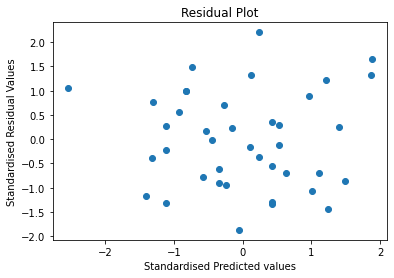

In [32]:
def get_std_values(vals):
  return(vals - vals.mean())/vals.std()
x_axis = get_std_values(mba_salary_lm.fittedvalues)
y_axis = get_std_values(mba_salary_lm.resid)
plt.scatter(x_axis, y_axis)
plt.xlabel("Standardised Predicted values")
plt.ylabel("Standardised Residual Values")
plt.title("Residual Plot")
plt.show()

**The residual plot is not funnel shaped. Hence residuals have constant variance.**

#### **Model Diagnostics - Oulier Detection**
Outliers are observations whose values show a large deviation from the mean value. Their presence can have a significant influence on the values of the regression coefficients. Hence we use Z-Score to identify their existence in the data. Any obervation with an Z-Score of more than 3.0 is an outlier. 

In [33]:
#from scipy.stats import zscore
mba_salary_df['z_score_salary'] = zscore(mba_salary_df.Salary)
#mba_salary_df.head()
mba_salary_df[(mba_salary_df.z_score_salary > 3.0)| (mba_salary_df.z_score_salary< -3.0)]

,S. No.,Percentage in Grade 10,Salary,z_score_salary


**Hence there is no outliner.**

#### **Model Diagnostics - Finding highly influential Observations using Cooks's distance.**
This distance measures how much the predicted value of the dependent variable changes for all observations on the sample when a particular observation is removed from the sample while estimating the regression parameters. get_influence() returns the influence of each observations and cook_distance variable provides Cook's distance measures. An observation with Cook's distance of more than 1 is highly influential.

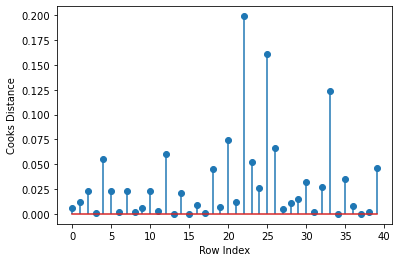

In [34]:
import numpy as np
mba_influence = mba_salary_lm.get_influence()
(c,p) = mba_influence.cooks_distance
plt.stem(np.arange(len(train_X)), np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

**There is no observation with Cooks's distance > 1. Hence none of them are influential.**

#### **Making predictions on validation set and measuring accuracy - R-Squared and RMSE** 

In [35]:
#import numpy as np
#from sklearn.metrics import r2_score, mean_squared_error
pred_y = mba_salary_lm.predict(test_X)
print('R2 Score =',np.abs(r2_score(test_y,pred_y)))
print('RMSE = ', np.sqrt(mean_squared_error(test_y,pred_y)))

R2 Score = 0.4536705380726962
RMSE =  61393.28235186982


### **References**

https://en.wikipedia.org/wiki/Python_(programming_language)

https://en.wikipedia.org/wiki/Supervised_learning#:~:text=Supervised%20learning%20(SL)%20is%20the,on%20example%20input%2Doutput%20pairs.&text=A%20supervised%20learning%20algorithm%20analyzes,used%20for%20mapping%20new%20examples.

https://en.wikipedia.org/wiki/Linear_regression

https://en.wikipedia.org/wiki/Simple_linear_regression

https://en.wikipedia.org/wiki/Ordinary_least_squares

https://en.wikipedia.org/wiki/Root-mean-square_deviation

https://en.wikipedia.org/wiki/Heteroscedasticity

**For Anaconda Distribution platform** : https://www.anaconda.com/products/individual
